## Import the libraries

In [30]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

import json # library to handle JSON files

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
import geocoder # to get coordinates

import requests # library to handle requests
from bs4 import BeautifulSoup # library to parse HTML and XML documents

from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

from scipy.spatial.distance import cdist
# import k-means from clustering stage
from sklearn.cluster import KMeans

import folium # map rendering library

## Neighborhood Data
* Neighborhood list
* Neighborhood geographic information

In [2]:
data = requests.get('https://en.wikipedia.org/wiki/Category:Neighborhoods_in_Syracuse,_New_York').text
soup = BeautifulSoup(data, 'html.parser')

In [3]:
neighborhoodList = []
# append the data into the list
for row in soup.find_all("div", class_="mw-category")[0].findAll("li"):
    neighborhoodList.append(row.text)

In [4]:
df = pd.DataFrame(neighborhoodList, columns=["Neighborhood"])
df.head(10)

,Neighborhood
0,Armory Square
1,"Brighton, Syracuse, New York"
2,"Columbus Circle (Syracuse, New York)"
3,Downtown Syracuse
4,"Eastwood, Syracuse, New York"
5,"Elmwood, Syracuse, New York"
6,"Far Westside, Syracuse"
7,"Franklin Square, Syracuse"
8,"Hanover Square, Syracuse"
9,Hawley–Green Historic District


In [5]:
df['Neighborhood'] = df['Neighborhood'].apply(lambda x: x.split(',')[0])
df['Neighborhood'] = df['Neighborhood'].apply(lambda x: x.split('(')[0])
df['Neighborhood'] = df['Neighborhood'].apply(lambda x: x.split('–')[0])
df.head(10)

,Neighborhood
0,Armory Square
1,Brighton
2,Columbus Circle
3,Downtown Syracuse
4,Eastwood
5,Elmwood
6,Far Westside
7,Franklin Square
8,Hanover Square
9,Hawley


In [6]:
# define a function to get coordinates
def get_latlng(neighborhood):
    # initialize your variable to None
    lat_lng_coords = None
    # loop until you get the coordinates
    while(lat_lng_coords is None):
        g = geocoder.arcgis('{}, Syracuse, United States'.format(neighborhood))
        lat_lng_coords = g.latlng
    return lat_lng_coords

In [7]:
location = [ get_latlng(neighborhood) for neighborhood in df["Neighborhood"].tolist() ]

In [8]:
location

[[43.04809000000006, -76.15440999999998],
 [43.02521000000007, -76.14513999999997],
 [43.046820000000025, -76.14931999999999],
 [43.04704000000004, -76.15006999999997],
 [43.06567000000007, -76.10483999999997],
 [43.01864000000006, -76.16141999999996],
 [43.052410000000066, -76.18967999999995],
 [43.057352277988734, -76.15564563260868],
 [43.050500000000056, -76.15098999999998],
 [43.054262614576636, -76.13395526314385],
 [40.681322846835435, -96.19778265882186],
 [34.47927000000004, -82.80124999999998],
 [43.058100000000024, -76.12613999999996],
 [43.05686000000003, -76.15208999999999],
 [43.04291000000006, -76.09380999999996],
 [43.04898136070665, -76.14931422285339],
 [43.048470000000066, -76.13316999999995],
 [43.05311000000006, -76.14891999999998],
 [43.03723000000008, -76.16906999999998],
 [43.07939523810382, -76.11437326339895],
 [43.07696000000004, -76.14919999999995],
 [43.020140000000026, -76.13181999999995],
 [43.05042000000003, -76.14737999999994],
 [43.05042000000003, -76.

In [9]:
df_location = pd.DataFrame(location, columns=['Latitude', 'Longitude'])
# merge the coordinates into the original dataframe
df['Latitude'] = df_location['Latitude']
df['Longitude'] = df_location['Longitude']

In [10]:
df.head(10)

,Neighborhood,Latitude,Longitude
0,Armory Square,43.048090,-76.154410
1,Brighton,43.025210,-76.145140
2,Columbus Circle,43.046820,-76.149320
3,Downtown Syracuse,43.047040,-76.150070
4,Eastwood,43.065670,-76.104840
5,Elmwood,43.018640,-76.161420
6,Far Westside,43.052410,-76.189680
7,Franklin Square,43.057352,-76.155646
8,Hanover Square,43.050500,-76.150990
9,Hawley,43.054263,-76.133955


In [11]:
df.shape

(38, 3)

In [12]:
# export the dataframe to csv file
df.to_csv('syracuse.csv')

In [13]:
# get the longtitude and latitude of Syracuse, United States
address = 'Syracuse, United States'

geolocator = Nominatim(user_agent="my-application")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Syracuse are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Syracuse are 43.0481221, -76.1474244.


In [14]:
# create a map
map_syracuse = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, neighborhood in zip(df['Latitude'], df['Longitude'], df['Neighborhood']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(map_syracuse)  
    
map_syracuse

In [15]:
# save the map as HTML file
map_syracuse.save('map_syracuse.html')

## Exploration on Foursquare

In [16]:
CLIENT_ID = 'XTZCWUE0IPY1WXYUTHFV4SZAVAADXFZ2O4VRIGF5MWESP4TK' # your Foursquare ID
CLIENT_SECRET = 'TOSOPI3WF3VKNTFKV2D0FTIR4RNZQIJL5GTACBK5X531DQMT' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: XTZCWUE0IPY1WXYUTHFV4SZAVAADXFZ2O4VRIGF5MWESP4TK
CLIENT_SECRET:TOSOPI3WF3VKNTFKV2D0FTIR4RNZQIJL5GTACBK5X531DQMT


In [17]:
def getNearbyVenues(names, latitudes, longitudes, radius=2000, LIMIT=100):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [18]:
syracuse_venues = getNearbyVenues(names=df['Neighborhood'],
                                   latitudes=df['Latitude'],
                                   longitudes=df['Longitude']
                                  )

Armory Square
Brighton
Columbus Circle 
Downtown Syracuse
Eastwood
Elmwood
Far Westside
Franklin Square
Hanover Square
Hawley
Inner Harbor
Lakefront
Lincoln Hill
Little Italy
Meadowbrook
Montgomery Street
Near Eastside
Near Northeast
Near Westside
North Valley
Northside
Outer Comstock
SALT District
Salt Springs
Scottholm
Sedgwick
Skunk City
Skytop
South Valley
Southwest
Strathmore
Tipperary Hill
University Hill
University Neighborhood
Washington Square
Westcott
Westside
Template:Syracuse Neighborhoods


In [43]:
print(syracuse_venues.shape)
syracuse_venues.head(10)

(2937, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Armory Square,43.04809,-76.15441,Kitty Hoynes,43.048586,-76.155651,Pub
1,Armory Square,43.04809,-76.15441,Original Grain,43.048669,-76.152490,Restaurant
2,Armory Square,43.04809,-76.15441,Armory Square,43.047471,-76.155531,Plaza
3,Armory Square,43.04809,-76.15441,Al's Wine And Whiskey Lounge,43.048153,-76.153343,Wine Bar
4,Armory Square,43.04809,-76.15441,Cafe Kubal Downtown Cafe,43.046872,-76.152258,Café
5,Armory Square,43.04809,-76.15441,The Sound Garden,43.047497,-76.156094,Record Shop
6,Armory Square,43.04809,-76.15441,Urban Outfitters,43.047890,-76.156670,Clothing Store
7,Armory Square,43.04809,-76.15441,Cafe Kubal at Creekwalk Commons,43.050850,-76.155818,Coffee Shop
8,Armory Square,43.04809,-76.15441,Landmark Theatre,43.047167,-76.152553,Theater
9,Armory Square,43.04809,-76.15441,Funk 'n Waffles,43.048340,-76.153364,Breakfast Spot


In [20]:
syracuse_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Armory Square,100,100,100,100,100,100
Brighton,49,49,49,49,49,49
Columbus Circle,100,100,100,100,100,100
Downtown Syracuse,100,100,100,100,100,100
Eastwood,93,93,93,93,93,93
Elmwood,34,34,34,34,34,34
Far Westside,60,60,60,60,60,60
Franklin Square,100,100,100,100,100,100
Hanover Square,100,100,100,100,100,100


In [21]:
print('There are {} uniques categories.'.format(len(syracuse_venues['Venue Category'].unique())))

There are 193 uniques categories.


In [22]:
# one hot encoding
syracuse_onehot = pd.get_dummies(syracuse_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
syracuse_onehot['Neighborhood'] = syracuse_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [syracuse_onehot.columns[-1]] + list(syracuse_onehot.columns[:-1])
syracuse_onehot = syracuse_onehot[fixed_columns]

syracuse_onehot.head()

,Neighborhood,Accessories Store,American Restaurant,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Automotive Shop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Beach,Beer Bar,Beer Garden,Bike Shop,Bistro,Bookstore,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Buffet,Burger Joint,Bus Station,Business Service,Café,Candy Store,Caribbean Restaurant,Chinese Restaurant,Chocolate Shop,Clothing Store,Cocktail Bar,Coffee Shop,College Academic Building,College Hockey Rink,College Rec Center,College Residence Hall,College Theater,Comedy Club,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Dive Bar,Donut Shop,Dry Cleaner,Eastern European Restaurant,Electronics Store,Empanada Restaurant,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Fish Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Football Stadium,Fried Chicken Joint,Furniture / Home Store,Garden,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Golf Course,Golf Driving Range,Gourmet Shop,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Halal Restaurant,Harbor / Marina,Hardware Store,Historic Site,History Museum,Hobby Shop,Home Service,Hotel,Hotel Bar,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Karaoke Bar,Korean Restaurant,Lake,Latin American Restaurant,Lingerie Store,Liquor Store,Lounge,Market,Martial Arts Dojo,Massage Studio,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Mobile Phone Shop,Motorcycle Shop,Movie Theater,Moving Target,Music Store,Music Venue,Nail Salon,New American Restaurant,Nightclub,Noodle House,Office,Optical Shop,Other Nightlife,Outlet Store,Park,Performing Arts Venue,Pet Service,Pet Store,Pharmacy,Pizza Place,Plaza,Pool,Print Shop,Pub,Record Shop,Recycling Facility,Rental Car Location,Rental Service,Residential Building (Apartment / Condo),Restaurant,Rock Club,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Science Museum,Seafood Restaurant,Shipping Store,Shopping Mall,Shopping Plaza,Skating Rink,Smoke Shop,Snack Place,Soccer Field,Spa,Sporting Goods Shop,Sports Bar,Steakhouse,Storage Facility,Student Center,Supermarket,Supplement Shop,Sushi Restaurant,Taco Place,Tailor Shop,Tapas Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Park,Theme Park Ride / Attraction,Thrift / Vintage Store,Trail,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Weight Loss Center,Wine Bar,Wings Joint,Women's Store,Yoga Studio,Zoo
0,Armory Square,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Armory Square,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Armory Square,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Armory Square,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [23]:
syracuse_onehot.shape

(2937, 194)

In [24]:
syracuse_grouped = syracuse_onehot.groupby(["Neighborhood"]).mean().reset_index()

print(syracuse_grouped.shape)
syracuse_grouped

(38, 194)


,Neighborhood,Accessories Store,American Restaurant,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Automotive Shop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Beach,Beer Bar,Beer Garden,Bike Shop,Bistro,Bookstore,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Buffet,Burger Joint,Bus Station,Business Service,Café,Candy Store,Caribbean Restaurant,Chinese Restaurant,Chocolate Shop,Clothing Store,Cocktail Bar,Coffee Shop,College Academic Building,College Hockey Rink,College Rec Center,College Residence Hall,College Theater,Comedy Club,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Dive Bar,Donut Shop,Dry Cleaner,Eastern European Restaurant,Electronics Store,Empanada Restaurant,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Fish Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Football Stadium,Fried Chicken Joint,Furniture / Home Store,Garden,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Golf Course,Golf Driving Range,Gourmet Shop,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Halal Restaurant,Harbor / Marina,Hardware Store,Historic Site,History Museum,Hobby Shop,Home Service,Hotel,Hotel Bar,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Karaoke Bar,Korean Restaurant,Lake,Latin American Restaurant,Lingerie Store,Liquor Store,Lounge,Market,Martial Arts Dojo,Massage Studio,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Mobile Phone Shop,Motorcycle Shop,Movie Theater,Moving Target,Music Store,Music Venue,Nail Salon,New American Restaurant,Nightclub,Noodle House,Office,Optical Shop,Other Nightlife,Outlet Store,Park,Performing Arts Venue,Pet Service,Pet Store,Pharmacy,Pizza Place,Plaza,Pool,Print Shop,Pub,Record Shop,Recycling Facility,Rental Car Location,Rental Service,Residential Building (Apartment / Condo),Restaurant,Rock Club,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Science Museum,Seafood Restaurant,Shipping Store,Shopping Mall,Shopping Plaza,Skating Rink,Smoke Shop,Snack Place,Soccer Field,Spa,Sporting Goods Shop,Sports Bar,Steakhouse,Storage Facility,Student Center,Supermarket,Supplement Shop,Sushi Restaurant,Taco Place,Tailor Shop,Tapas Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Park,Theme Park Ride / Attraction,Thrift / Vintage Store,Trail,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Weight Loss Center,Wine Bar,Wings Joint,Women's Store,Yoga Studio,Zoo
0,Armory Square,0.00,0.010000,0.000000,0.000000,0.00,0.010000,0.000000,0.000000,0.010000,0.000000,0.000000,0.040000,0.000000,0.030000,0.000000,0.00000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.010000,0.020000,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.030000,0.00,0.010000,0.000000,0.00,0.030000,0.010000,0.100000,0.000000,0.000000,0.000000,0.000000,0.010000,0.00,0.010000,0.000000,0.000000,0.000000,0.010000,0.00,0.010000,0.010000,0.010000,0.00000,0.020000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010000,0.010000,0.010000,0.000000,0.000000,0.000000,0.000000,0.020000,0.020000,0.040000,0.000000,0.000000,0.00000,0.000000,0.000000,0.010000,0.010000,0.000000,0.000000,0.020000,0.000000,0.000000,0.010000,0.000000,0.000000,0.000000,0.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.010000,0.020000,0.000000,0.000000,0.010000,0.000000,0.000000,0.020000,0.000000,0.000000,0.010000,0.00,0.000000,0.000000,0.000000,0.00,0.01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010000,0.000000,0.000000,0.020000,0.030000,0.000000,0.00000,0.030000,0.010000,0.00

In [25]:
len(syracuse_grouped[syracuse_grouped["Café"] > 0])

23

In [26]:
syr_cafe = syracuse_grouped[["Neighborhood","Café"]]
syr_cafe.head()

,Neighborhood,Café
0,Armory Square,0.030000
1,Brighton,0.061224
2,Columbus Circle,0.030000
3,Downtown Syracuse,0.030000
4,Eastwood,0.000000


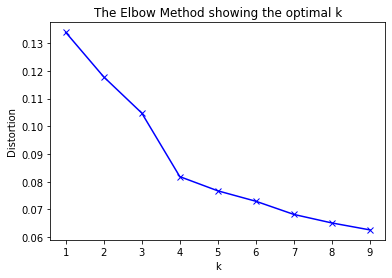

In [31]:
syracuse_grouped_clustering = syracuse_grouped.drop(columns=['Neighborhood'])
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(syracuse_grouped_clustering)
    kmeanModel.fit(syracuse_grouped_clustering)
    distortions.append(sum(np.min(cdist(syracuse_grouped_clustering, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / syracuse_grouped_clustering.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [32]:
# set number of clusters
kclusters = 4

syr_clustering = syr_cafe.drop(["Neighborhood"], 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(syr_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([0, 3, 0, 0, 1, 1, 1, 2, 0, 0], dtype=int32)

In [33]:
# create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.
syr_merged = syr_cafe.copy()

# add clustering labels
syr_merged["Cluster Labels"] = kmeans.labels_

In [34]:
syr_merged.rename(columns={"Neighborhood": "Neighborhood"}, inplace=True)
syr_merged.head()

,Neighborhood,Café,Cluster Labels
0,Armory Square,0.030000,0
1,Brighton,0.061224,3
2,Columbus Circle,0.030000,0
3,Downtown Syracuse,0.030000,0
4,Eastwood,0.000000,1


In [35]:
# merge syracuse_grouped with toronto_data to add latitude/longitude for each neighborhood
syr_merged = syr_merged.join(df.set_index("Neighborhood"), on="Neighborhood")

print(syr_merged.shape)
syr_merged.head() # check the last columns!

(38, 5)


,Neighborhood,Café,Cluster Labels,Latitude,Longitude
0,Armory Square,0.030000,0,43.04809,-76.15441
1,Brighton,0.061224,3,43.02521,-76.14514
2,Columbus Circle,0.030000,0,43.04682,-76.14932
3,Downtown Syracuse,0.030000,0,43.04704,-76.15007
4,Eastwood,0.000000,1,43.06567,-76.10484


In [36]:
# sort the results by Cluster Labels
print(syr_merged.shape)
syr_merged.sort_values(["Cluster Labels"], inplace=True)
syr_merged

(38, 5)


,Neighborhood,Café,Cluster Labels,Latitude,Longitude
0,Armory Square,0.030000,0,43.048090,-76.154410
31,Template:Syracuse Neighborhoods,0.030000,0,43.050420,-76.147380
24,Scottholm,0.034483,0,43.042563,-76.110222
22,SALT District,0.030000,0,43.050420,-76.147380
21,Outer Comstock,0.028571,0,43.020140,-76.131820
36,Westcott,0.030000,0,43.041070,-76.119310
17,Near Northeast,0.030000,0,43.053110,-76.148920
16,Near Eastside,0.020000,0,43.048470,-76.133170
15,Montgomery Street,0.030000,0,43.048981,-76.149314
18,Near Westside,0.030000,0,43.037230,-76.169070


In [37]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(syr_merged['Latitude'], syr_merged['Longitude'], syr_merged['Neighborhood'], syr_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' - Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [38]:
# save the map as HTML file
map_clusters.save('map_clusters.html')

In [39]:
syr_merged.loc[syr_merged['Cluster Labels'] == 0]

,Neighborhood,Café,Cluster Labels,Latitude,Longitude
0,Armory Square,0.030000,0,43.048090,-76.154410
31,Template:Syracuse Neighborhoods,0.030000,0,43.050420,-76.147380
24,Scottholm,0.034483,0,43.042563,-76.110222
22,SALT District,0.030000,0,43.050420,-76.147380
21,Outer Comstock,0.028571,0,43.020140,-76.131820
36,Westcott,0.030000,0,43.041070,-76.119310
17,Near Northeast,0.030000,0,43.053110,-76.148920
16,Near Eastside,0.020000,0,43.048470,-76.133170
15,Montgomery Street,0.030000,0,43.048981,-76.149314
18,Near Westside,0.030000,0,43.037230,-76.169070


In [40]:
syr_merged.loc[syr_merged['Cluster Labels'] == 1]

,Neighborhood,Café,Cluster Labels,Latitude,Longitude
35,Washington Square,0.01,1,43.067640,-76.159580
32,Tipperary Hill,0.00,1,43.046960,-76.184420
30,Strathmore,0.00,1,43.019500,-76.173990
28,South Valley,0.00,1,43.134640,-76.124570
26,Skunk City,0.00,1,43.033790,-76.178900
25,Sedgwick,0.00,1,43.066260,-76.132580
10,Inner Harbor,0.00,1,40.681323,-96.197783
20,Northside,0.00,1,43.076960,-76.149200
19,North Valley,0.00,1,43.079395,-76.114373
5,Elmwood,0.00,1,43.018640,-76.161420


In [41]:
syr_merged.loc[syr_merged['Cluster Labels'] == 2]

,Neighborhood,Café,Cluster Labels,Latitude,Longitude
7,Franklin Square,0.040000,2,43.057352,-76.155646
27,Skytop,0.048780,2,43.020230,-76.123690
13,Little Italy,0.040000,2,43.056860,-76.152090
33,University Hill,0.050505,2,43.040490,-76.133480
34,University Neighborhood,0.044444,2,43.031430,-76.118450


In [42]:
syr_merged.loc[syr_merged['Cluster Labels'] == 3]

,Neighborhood,Café,Cluster Labels,Latitude,Longitude
29,Southwest,0.060000,3,43.03805,-76.14988
1,Brighton,0.061224,3,43.02521,-76.14514
